# Energy Offset - Estimation


In [7]:
#Imports
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import reeds
from pygromos.files import repdat, imd

from reeds.function_libs.file_management import file_management


/cluster/home/bschroed/code/reeds/reeds/submodules/pygromos/pygromos/files/topology/top.py:20: UserWarning: Module topo-files is under Development and not entirely implemented!
  warnings.warn("Module topo-files is under Development and not entirely implemented!")


## Parse Data

In [22]:
#Define data path:
in_imd_path = "/cluster/work/igc/bschroed/REEDS/CHK1/water_d5/c_eoff_shuffle/input/repex_eoff.imd"

data_dir = "/cluster/work/igc/bschroed/REEDS/CHK1/water_d5/c_eoff_shuffle/analysis_800ps/data"
out_prefix = "CHK1_disres5_water_eoff_shuffle_energies_"

In [23]:
#parse
energy_trajectories = file_management.parse_csv_energy_trajectories(data_dir, out_prefix)
imd_file = imd.Imd(in_imd_path)

## Estimate Offsets

In [24]:
from reeds.function_libs.optimization import eds_energy_offsets as peoe



In [25]:
num_state = int(imd_file.REPLICA_EDS.NUMSTATES)
s_values = list(map(float, imd_file.REPLICA_EDS.RES))
initial_offsets = [0.0 for state in range(num_state)]

means, all_eoffs = peoe.estimate_energy_offsets(ene_trajs=energy_trajectories, 
                                                initial_offsets=initial_offsets, 
                                                s_values=s_values, 
                                                out_path=None,
                                                plot_results=False)




[[-438.25500323 -442.32494468 -444.16778262 -446.12269911 -446.93007844
  -447.3079476 ]
 [-429.35938842 -434.05559813 -435.78443382 -437.90419267 -438.63065068
  -438.99213632]
 [-429.96807702 -436.09565703 -438.81700887 -440.72211961 -442.06149324
  -442.68996204]
 [-511.07781532 -509.0931918  -508.52470765 -507.83693629 -507.53887769
  -507.38915014]
 [-523.05779605 -519.99817721 -518.54242885 -517.49141617 -516.91000821
  -516.55042346]]


Exception: Could not determine new offsets, as no undersampling detected!

[          time   solvtemp2  totdisres          eR             e1  \
 0         0.00  307.827974  45.797483 -894.108114    1892.542410   
 1         0.04  308.282353  45.919234 -853.242846     711.485039   
 2         0.08  302.329721  42.541171 -851.422991     541.924349   
 3         0.12  302.674214  36.263870 -869.834965     130.347085   
 4         0.16  296.824746  33.755822 -891.490222     271.403712   
 ...        ...         ...        ...         ...            ...   
 49995  1999.80  297.043898  36.417336 -933.737091  391035.028000   
 49996  1999.84  305.631807  38.479952 -928.479454   93583.397200   
 49997  1999.88  298.455312  44.643494 -902.589166  114965.415000   
 49998  1999.92  286.373434  49.667078 -924.522637  181761.556000   
 49999  1999.96  295.193453  46.734929 -953.305367  602153.864000   
 
                  e2            e3           e4          e5  
 0     -6.498571e+01     -9.325991  -396.039457 -894.108114  
 1      4.399143e+01    423.177929  -261.10120

converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps
converged after 1 steps


REEDS - Eoff Estimation:



	Energy Offsets for each Replica

| S	| e1 | e2 | e3 | e4 | e5 | iterations |
|---	|--- |---  |---  |---  |--- |--- |
|1.0000	|0.0 |	7.2231 |	123.794 |	-95.6342 |	-209.2493 	|	1|
|0.7500	|0.0 |	7.2231 |	116.9158 |	-101.6541 |	-209.2493 	|	1|
|0.5620	|0.0 |	7.2215 |	59.011 |	-120.676 |	-209.2493 	|	1|
|0.4220	|0.0 |	7.2219 |	59.0114 |	-120.6756 |	-209.2489 	|	1|
|0.3160	|0.0 |	6.8981 |	56.6969 |	-118.8075 |	-209.2485 	|	1|
|0.2370	|0.0 |	6.894 |	56.6928 |	-118.79

TypeError: unsupported operand type(s) for -: 'list' and 'float'

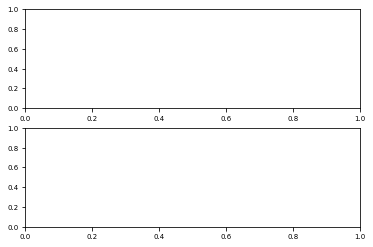

In [24]:
initial_Eoff_guess = [0 for x in range(int(imd_file.REPLICA_EDS.NUMSTATES))]
s_values = list(map(float, imd_file.REPLICA_EDS.RES))
out_path = []
pot_tresh= 0
frac_tresh = [0.9]

eoff_statistic = analysis.estimate_Eoff(ene_ana_trajs=energy_trajectories, 
                                        Eoff=initial_Eoff_guess, s_values=s_values,
                                        pot_tresh=pot_tresh, frac_tresh=frac_tresh,
                                       out_path=".")

## Visualize Results

In [23]:
eoff_statistic

NameError: name 'eoff_statistic' is not defined